# Homework 1
Ziqi Zhang

### Problem 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
p1 = pd.read_csv('problem1.csv')
p1

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


In [4]:
# list different countries
list(set(p1.Location))

['Southern Asia',
 'Wallis and Futuna Islands',
 'Southern Africa',
 'United Nations Economic and Social Commission for Asia and the Pacific (UN-ESCAP) Regions',
 'Small Island Developing States (SIDS)',
 'Cambodia',
 'Bonaire, Sint Eustatius and Saba',
 'Armenia',
 'Countries with Access to the Sea: Northern America',
 'WB region: Middle East and North Africa (excluding high income)',
 'France',
 'Less developed: Africa',
 'Togo',
 'No income group available',
 'Land-locked Countries (Others)',
 'Land-locked Countries',
 'African Union: Western Africa',
 'Cook Islands',
 'Northern Mariana Islands',
 'Panama',
 'El Salvador',
 'UN-ECE: member countries',
 'Nicaragua',
 'Portugal',
 'Congo',
 'Channel Islands',
 'ECE: North America-2',
 'Viet Nam',
 'Eastern Europe',
 'Economic Community of Central African States (ECCAS)',
 'Kiribati',
 'Argentina',
 'Organization of American States (OAS)',
 'United States Virgin Islands',
 'Northern Europe',
 'New EU member states (joined since 2004)',

In [5]:
# creating new df with poptotal of Canada
ca = p1[p1['Location']=='Canada']
ca = ca[['Location','PopTotal']].reset_index()
ca

,index,Location,PopTotal
0,38682,Canada,13733.398
1,38683,Canada,14078.449
2,38684,Canada,14445.453
3,38685,Canada,14834.905
4,38686,Canada,15245.416
...,...,...,...
879,39561,Canada,41695.434
880,39562,Canada,41551.816
881,39563,Canada,41446.817
882,39564,Canada,41273.988


In [6]:
ca_pt = ca.PopTotal
ca_pt

0      13733.398
1      14078.449
2      14445.453
3      14834.905
4      15245.416
         ...    
879    41695.434
880    41551.816
881    41446.817
882    41273.988
883    41241.998
Name: PopTotal, Length: 884, dtype: float64

In [7]:
# mean
avg = np.mean(ca_pt)
avg

44055.628449095086

In [8]:
# variance
var = np.var(ca_pt)
var

105661892.2885657

In [9]:
num = ca_pt.shape[0]
num

884

In [10]:
# skewness by first cal 3rd moment
mom3 = 0
for n in ca_pt:
    mom3 += (n-avg)**3
mom3/(num-1)/(sqrt(var)**3)

0.29345260149959307

In [11]:
# kurtosis by first cal 4th moment
mom4 = 0
for n in ca_pt:
    mom4 += (n-avg)**4
mom4/(num-1)/(var**2)

4.176722446507701

Text(0.5, 1.0, 'Population Total')

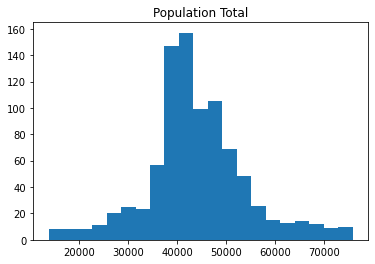

In [12]:
his = plt.hist(ca_pt,21)
plt.title('Population Total')

### Problem 2

<function matplotlib.pyplot.show(*args, **kw)>

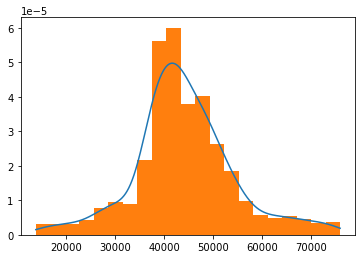

In [13]:
# KDE with Guassian
h = 1.06*sqrt(var)/num**(1/5)
x = np.linspace(np.min(ca_pt),np.max(ca_pt),num*2)
y = 0
for i in range(num):
    y += (exp(-(((x - ca_pt[i])/h)**2)/2)/sqrt(2*np.pi))/(num*h)
plt.plot(x,y)
plt.hist(ca_pt,21,density=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

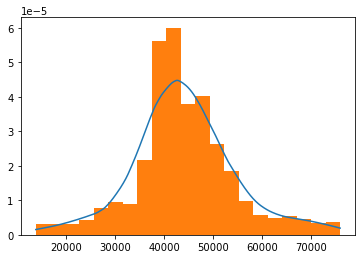

In [75]:
# with triangle
x = np.linspace(np.min(ca_pt),np.max(ca_pt),num*2)
y = np.zeros(num*2)
for i in range(num):
    m = (x-ca_pt[i])/sqrt(var)
    for j in range(len(m)):       
        if m[j] < 1 and m[j] > -1:
            y[j] += (1-abs(m[j]))/(num*sqrt(var))

plt.plot(x,y)
plt.hist(ca_pt,21,density=True)
plt.show

### Problem 3

In [31]:
# import data
p3 = pd.read_csv('problem3.csv')
p3

,z,x,y
0,4.255921,-0.709676,-0.978641
1,7.978876,-1.455924,-0.858735
2,5.899542,1.425732,1.274279
3,-10.992698,0.043074,1.763414
4,-19.934804,-1.211237,1.792038
...,...,...,...
495,-4.813292,0.262987,-1.302377
496,8.098024,-1.393941,-1.711588
497,-16.889154,1.109532,-2.292526
498,-8.200614,-0.331624,1.343569


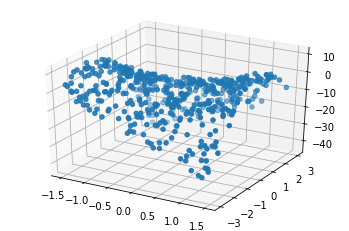

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(p3['x'], p3['y'], p3['z'])

In [73]:
# find the best fit of beta's
x = p3.x
y = p3.y
z = p3.z
s = x.size
X = np.ones((s,6));
X[:,1] = x
X[:,2] = y
X[:,3] = x*x 
X[:,4] = y*y
X[:,5] = x*y

bHatQ = linalg.pinv(X).dot(z)

bHatQ

array([ 0.97039542,  0.46859473, -2.01361753,  1.9408243 , -2.9918448 ,
        3.96982073])

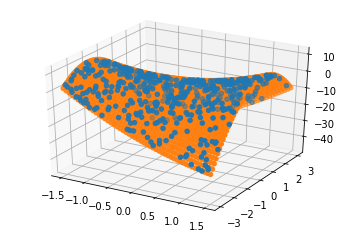

In [72]:
# plot the curve
x1 = np.linspace(np.min(x),np.max(x),50)
y1 = np.linspace(np.min(y),np.max(y),50)
x2, y2 = np.meshgrid(x1, y1)
x2 = np.hstack(x2)
y2 = np.hstack(y2)
X1 = np.ones((x2.size,6));
X1[:,1] = x2 
X1[:,2] = y2
X1[:,3] = x2*x2 
X1[:,4] = y2*y2
X1[:,5] = x2*y2

z2 = X1.dot(bHatQ)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.scatter(x2,y2,z2)